In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [68]:
filelist= os.listdir('Sales_Data')

In [69]:
print(type(filelist))
print(filelist)

<class 'list'>
['Sales_December_2019.csv', '.DS_Store', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'combined.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv']


In [70]:
for each_file in filelist:
    print(each_file)

Sales_December_2019.csv
.DS_Store
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
combined.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [71]:
#Declaring a path to variable
path = 'Sales_Data'

In [72]:
#let's create a dataframe object
df= pd.DataFrame()
df.shape

(0, 0)

In [73]:
#Let's see the shape of the csv files
for each_file in filelist:
    if each_file.startswith('.') or each_file.startswith("combined"):
        continue
    monthlyData = pd.read_csv(path+"/"+each_file, encoding='utf-8')
    print(monthlyData.shape)
    print(each_file)

(25117, 6)
Sales_December_2019.csv
(18383, 6)
Sales_April_2019.csv
(12036, 6)
Sales_February_2019.csv
(15226, 6)
Sales_March_2019.csv
(12011, 6)
Sales_August_2019.csv
(16635, 6)
Sales_May_2019.csv
(17661, 6)
Sales_November_2019.csv
(20379, 6)
Sales_October_2019.csv
(9723, 6)
Sales_January_2019.csv
(11686, 6)
Sales_September_2019.csv
(14371, 6)
Sales_July_2019.csv
(13622, 6)
Sales_June_2019.csv


In [74]:
#let's combine all
for each_file in filelist:
    monthlyData= pd.read_csv(path+"/"+each_file, encoding='utf-8')
    df= pd.concat([df,monthlyData])

In [75]:
df.to_csv('Sales_Data/combined.csv', index=False)

In [76]:
#now let's check the size of the dataframe
df.shape

(1333079, 7)

In [77]:
#let's check the first few rows 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


In [78]:
#Deleting the unnecessary columns
df= df.drop(df.columns[6], axis=1)

In [79]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [80]:
#let's check the types of data
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [81]:
#Data Pre Processing
df.isnull().sum()

Order ID            3907
Product             3907
Quantity Ordered    3907
Price Each          3907
Order Date          3907
Purchase Address    3907
dtype: int64

In [82]:
new_dataset= df.dropna(how="all")

In [83]:
new_dataset.shape

(1329172, 6)

In [84]:
new_dataset['Quantity Ordered'].unique()

array(['1', '2', '4', '3', 'Quantity Ordered', '7', '5', '6', '8', '9'],
      dtype=object)

In [85]:
new_dataset['Order ID'].unique()

array(['295665', '295666', '295667', ..., '222907', '222908', '222909'],
      dtype=object)

In [86]:
new_dataset['Price Each'].unique()

array(['1700', '600.0', '11.95', '149.99', '3.84', '99.99', '2.99',
       '999.99', '14.95', '600', '11.99', '150', '400', '700', '109.99',
       '379.99', '300', '389.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [87]:
latest_dataset= new_dataset[new_dataset['Quantity Ordered'] != 'Quantity Ordered']

In [88]:
latest_dataset['Quantity Ordered'] = latest_dataset['Quantity Ordered'].astype(int)

/var/folders/yv/n9tcwh_13fg8vtc598pb0bf40000gn/T/ipykernel_5782/540706981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_dataset['Quantity Ordered'] = latest_dataset['Quantity Ordered'].astype(int)


In [89]:
latest_dataset.dtypes

Order ID            object
Product             object
Quantity Ordered     int64
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [90]:
latest_dataset= new_dataset[new_dataset['Order ID'] != 'Order ID']

In [91]:
latest_dataset['Order ID'] = latest_dataset['Order ID'].astype(int)

/var/folders/yv/n9tcwh_13fg8vtc598pb0bf40000gn/T/ipykernel_5782/2138408393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_dataset['Order ID'] = latest_dataset['Order ID'].astype(int)


In [92]:
latest_dataset.dtypes

Order ID             int64
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [93]:
latest_dataset= new_dataset[new_dataset['Price Each'] != 'Price Each']

In [94]:
latest_dataset['Price Each'] = latest_dataset['Price Each'].astype(float)

/var/folders/yv/n9tcwh_13fg8vtc598pb0bf40000gn/T/ipykernel_5782/2604884663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_dataset['Price Each'] = latest_dataset['Price Each'].astype(float)


In [95]:
latest_dataset.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [96]:
latest_dataset['Order ID'] = pd.to_numeric(latest_dataset['Order ID'], errors='coerce').astype(int)

/var/folders/yv/n9tcwh_13fg8vtc598pb0bf40000gn/T/ipykernel_5782/3288927695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_dataset['Order ID'] = pd.to_numeric(latest_dataset['Order ID'], errors='coerce').astype(int)


In [97]:
latest_dataset['Quantity Ordered'] = pd.to_numeric(latest_dataset['Quantity Ordered'], errors='coerce').astype(int)

/var/folders/yv/n9tcwh_13fg8vtc598pb0bf40000gn/T/ipykernel_5782/130950160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_dataset['Quantity Ordered'] = pd.to_numeric(latest_dataset['Quantity Ordered'], errors='coerce').astype(int)


In [98]:
latest_dataset.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [99]:
#Creating a function
#accepting the index 0 of the / sign
def month(x):
    return x.split('/')[0]

In [100]:
latest_dataset['Month'] = latest_dataset['Order Date'].apply(month)

/var/folders/yv/n9tcwh_13fg8vtc598pb0bf40000gn/T/ipykernel_5782/2174969509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_dataset['Month'] = latest_dataset['Order Date'].apply(month)


In [101]:

latest_dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [102]:
latest_dataset['Month'] = latest_dataset['Month'].astype(int)

/var/folders/yv/n9tcwh_13fg8vtc598pb0bf40000gn/T/ipykernel_5782/3800930550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_dataset['Month'] = latest_dataset['Month'].astype(int)


In [103]:
latest_dataset.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [104]:
#Monthly Data Analysis
latest_dataset['Sales'] = round(latest_dataset['Quantity Ordered']*latest_dataset['Price Each'])

/var/folders/yv/n9tcwh_13fg8vtc598pb0bf40000gn/T/ipykernel_5782/3892319213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_dataset['Sales'] = round(latest_dataset['Quantity Ordered']*latest_dataset['Price Each'])


In [105]:
latest_dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,12.0
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,150.0
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,12.0


In [106]:
latest_dataset.groupby('Month')['Sales'].sum()

Month
1     12767123.0
2     15417479.0
3     19653879.0
4     23739821.0
5     22072778.0
6     18048464.0
7     18538401.0
8     15714601.0
9     14686217.0
10    26162682.0
11    22402093.0
12    36912638.0
Name: Sales, dtype: float64

In [107]:
#plotting the graph

<BarContainer object of 12 artists>

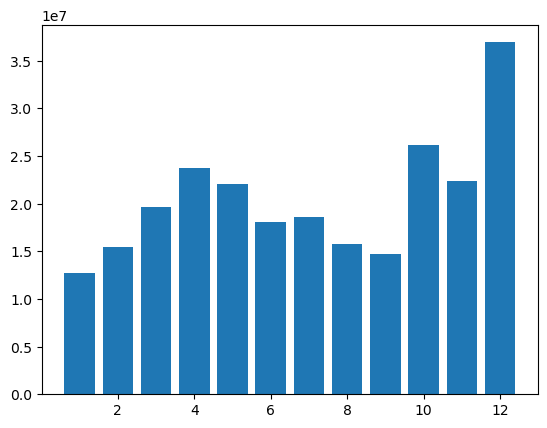

In [108]:
month = range(1,13)
plt.bar(month,latest_dataset.groupby('Month')['Sales'].sum())